In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import	matplotlib.pyplot as plt

In [2]:
dataset =	sns.load_dataset('penguins')
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
dataset.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
dataset.fillna(dataset["bill_length_mm"].mean(), inplace=True)

In [6]:
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.00000,3750.00000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.00000,3800.00000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.00000,3250.00000,Female
3,Adelie,Torgersen,43.92193,43.92193,43.92193,43.92193,43.92193
4,Adelie,Torgersen,36.70000,19.30000,193.00000,3450.00000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,43.92193,43.92193,43.92193,43.92193
340,Gentoo,Biscoe,46.80000,14.30000,215.00000,4850.00000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.00000,5750.00000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.00000,5200.00000,Female


C:\Users\Noman Traders\AppData\Local\Temp\ipykernel_9820\3827816552.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( dataset['bill_length_mm'], kde=True, bins=30 )


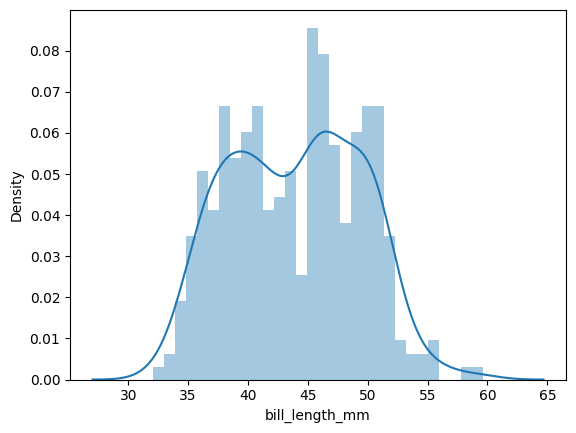

In [7]:
sns.distplot( dataset['bill_length_mm'], kde=True, bins=30 )
plt.show()

In [8]:
q1 = dataset['bill_length_mm'].quantile(0.25)
q3 = dataset['bill_length_mm'].quantile(0.75)
iqr = q3 - q1

In [11]:
min_limit = q1 - 1.5 * iqr
max_limit = q3 + 1.5 * iqr
min_limit, max_limit

(np.float64(25.437499999999996), np.float64(62.337500000000006))

In [18]:
dataset = dataset[(dataset['bill_length_mm'] > max_limit)]

In [ ]:
sns.distplot( dataset['bill_length_mm'])
plt.show()

In [3]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [5]:
ft =	FunctionTransformer(func=np.log1p, validate=True)

In [ ]:
ft.fit(dataset[['bill_length_mm']])

In [ ]:
ft = ft.transform(dataset[['bill_length_mm']])

In [ ]:
dataset[['bill_length_mm_ft']] = ft

In [ ]:
plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Before Function Transformer')
sns.distplot( dataset['bill_length_mm'])

plt.subplot(1,2,2)
plt.title('After Function Transformer')
sns.distplot( dataset['bill_length_mm_ft'])
plt.show()


In [ ]:
ft1	=	FunctionTransformer(func=np.square, validate=True)
ft1.fit(dataset[['bill_length_mm']])
ft1 = ft1.transform(dataset[['bill_length_mm']])
dataset[['bill_length_mm_ft_sqrt']] = ft1

plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Before Function Transformer')
sns.distplot( dataset['bill_length_mm'])
plt.subplot(1,2,2)
plt.title('After Function Transformer - Sqrt')
sns.distplot( dataset['bill_length_mm_ft_sqrt'])
plt.show()

In [ ]:
ft2 =	FunctionTransformer(func=np.sqrt, validate=True)
ft2.fit(dataset[['bill_length_mm']])
ft2 = ft2.transform(dataset[['bill_length_mm']])
dataset[['bill_length_mm_ft_sqrt']] = ft2

plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Before Function Transformer')
sns.distplot( dataset['bill_length_mm'])
plt.subplot(1,2,2)
plt.title('After Function Transformer - Sqrt')
sns.distplot( dataset['bill_length_mm_ft_sqrt'])
plt.show()


In [ ]:
ft3	=	FunctionTransformer(func=np.exp, validate=True)
ft3.fit(dataset[['bill_length_mm']])
ft3 = ft3.transform(dataset[['bill_length_mm']])
dataset[['bill_length_mm_ft_exp']] = ft3

plt.subplots(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Before Function Transformer')
sns.distplot( dataset['bill_length_mm'])

plt.subplot(1,2,2)
plt.title('After Function Transformer - Exp')
sns.distplot( dataset['bill_length_mm_ft_exp'])
plt.show()

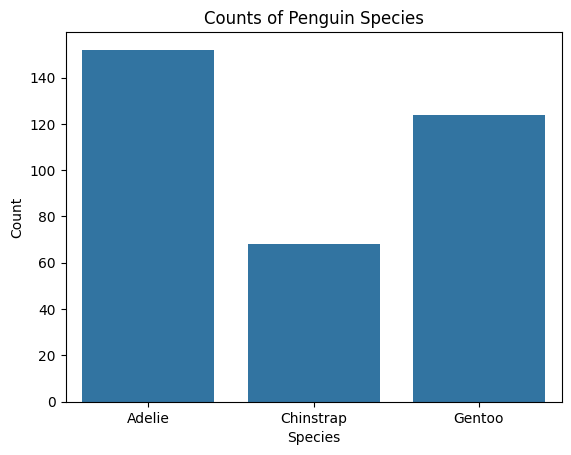

In [23]:
# species is categorical; use a countplot instead of distplot (which expects numeric data)
sns.countplot(x='species', data=dataset)
plt.title("Counts of Penguin Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()